In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np

## 1 Задание

Строим одно дерево и оцениваем его кросс-валидацией с 10-ю фолдами.

In [2]:
X, y = load_digits(return_X_y=True)

In [2]:
tree = tree.DecisionTreeClassifier(random_state=1)
meancsv = cross_val_score(tree, X, y, cv=10).mean()
print(meancsv)

0.8308624439503834


In [3]:
def write_answer_1(meancsv):
    with open("bagging_drill_1.txt", "w") as fout:
        fout.write(str(meancsv))

write_answer_1(meancsv)

## 2 Задание

Далее испольюзем Бэггинг классификатор. Он вытаскивает из выборки объекты (по одному) с возвратом, формируя таким образом выборку такого же размера. Далее полученные выборки можно использовать для построения леса.

In [10]:
BC = BaggingClassifier(tree, 100)

In [6]:
meanbc = cross_val_score(BC, X, y, cv=10).mean()
print(meanbc)

In [9]:
def write_answer_2(meancsv):
    with open("bagging_drill_2.txt", "w") as fout:
        fout.write(str(meanbc))

write_answer_2(meanbc)

0.9259923050140317


## 3 Задание

Далее опять используем бэггинг, с той разницей, что вручную задаем количество случайно выбранных признаков, на которых он будет обучаться. Это уже называется методом случайных подпространств.

In [40]:
max_features = int(X.shape[1]**(1/2))

In [41]:
BC1 = BaggingClassifier(tree, 100, max_features=max_features)

In [42]:
meanbc = cross_val_score(BC1, X, y, cv=10).mean()
print(meanbc)

0.928708058059207


In [43]:
def write_answer_3(meancbc):
    with open("bagging_drill_3.txt", "w") as fout:
        fout.write(str(meanbc))

write_answer_3(meanbc)

## 4 задание

Далее будем использовать случайный лес. Это значит, что мы будем случайно выбирать фиксированное количество признаков для выбора лучшего из них при каждом разветвлении обучаемого дерева. И так в каждом дереве нашего леса.

In [3]:
max_features = int(X.shape[1]**(1/2))

In [4]:
tree = tree.DecisionTreeClassifier(max_features=max_features, random_state=1)
BC2 = BaggingClassifier(tree, 100)

In [5]:
meanbc = cross_val_score(BC2, X, y, cv=10).mean()
print(meanbc)

0.9561391851115435


In [7]:
def write_answer_4(meancbc):
    with open("bagging_drill_4.txt", "w") as fout:
        fout.write(str(meanbc))

write_answer_4(meanbc)

## 5 задание

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
RFC = RandomForestClassifier(n_estimators=100, max_features=max_features, max_depth = 2)

Исследуем зависимость количества деревьев и оценки качества CV:

In [42]:
x = [5, 10, 15, 100, 120, 150, 200]

In [43]:
forestvar = list(map(lambda x: cross_val_score(RandomForestClassifier(n_estimators=x, max_features=max_features), X, y, cv=10).mean(), x))

Text(0.5, 1.0, 'Forest size influense')

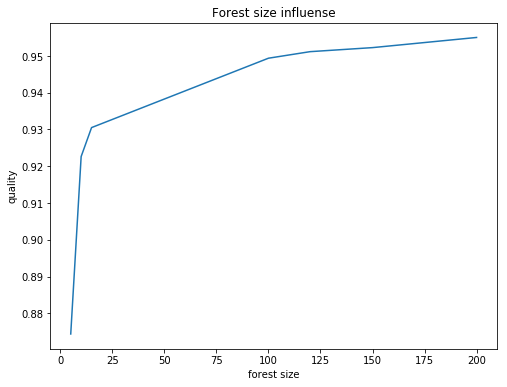

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(x, forestvar)
plt.xlabel('forest size')
plt.ylabel('quality')
plt.title('Forest size influense')

Исследуем зависимость количества признаков и качества:

In [48]:
x = (5, 10, 40, 50)

In [50]:
attrvar = list(map(lambda x: cross_val_score(RandomForestClassifier(
    n_estimators=100, max_features=x), X, y, cv=10).mean(), x))

Text(0.5, 1.0, 'attributes number influense')

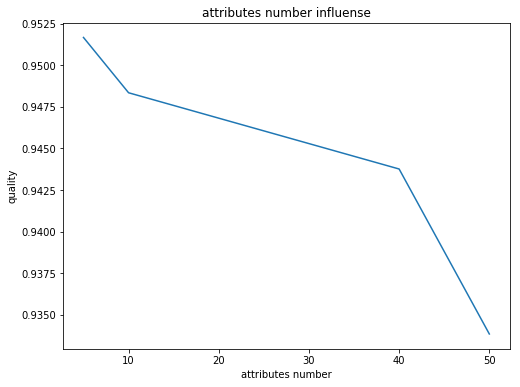

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(x, attrvar)
plt.xlabel('attributes number')
plt.ylabel('quality')
plt.title('attributes number influense')

Исследуем зависимость глубины деревьев и качества алгоритма:

In [52]:
x = (5, None)

In [56]:
depthvar = list(map(lambda x: cross_val_score(RandomForestClassifier(
    n_estimators=100, max_features=max_features, max_depth = x), X, y, cv=10).mean(), x))

In [59]:
depthvar

[0.9148852788471611, 0.9505263477126311]